In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import online data

from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
# input variables or features (X)

digits.data.shape   # means 1797 pictures, size 64 = 8*8
X = digits.data

In [4]:
# output lables (y)

digits.target.shape
y = digits.target

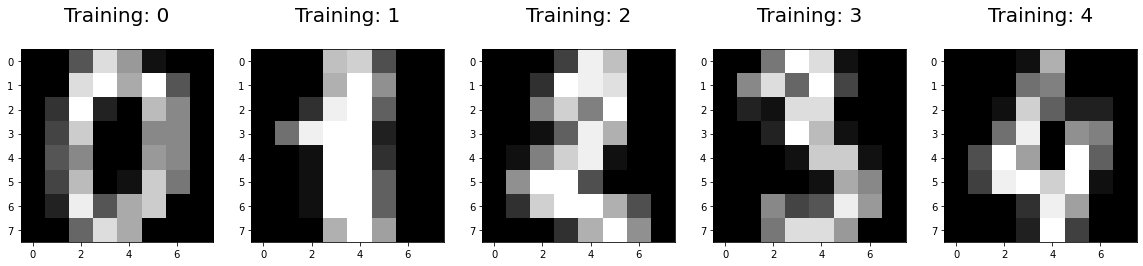

In [5]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)


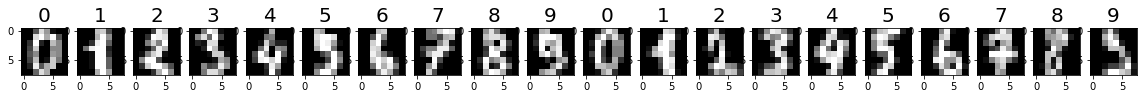

In [6]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:20], digits.target[0:20])):
    plt.subplot(1, 20, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(label, fontsize=20)

In [7]:
# help(plt)

In [8]:
# split the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [9]:
print("Train input data: ", X_train.shape)
print("Train input data: ", X_test.shape)
print("Test input data: ", y_train.shape)
print("Test input data: ", y_test.shape)

Train input data:  (1168, 64)
Train input data:  (629, 64)
Test input data:  (1168,)
Test input data:  (629,)


In [10]:
# import train

from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)

model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
model.predict(X_test[0:10])
prediction = model.predict(X_test)
prediction

array([4, 9, 5, 4, 6, 8, 8, 6, 8, 2, 5, 2, 8, 4, 7, 4, 4, 1, 1, 1, 0, 7,
       7, 8, 1, 5, 7, 0, 8, 3, 3, 3, 2, 1, 1, 8, 2, 7, 4, 5, 9, 7, 6, 3,
       4, 5, 2, 4, 1, 8, 2, 7, 2, 5, 3, 7, 1, 0, 1, 4, 2, 8, 9, 6, 8, 5,
       2, 2, 8, 5, 8, 9, 6, 0, 3, 0, 4, 6, 4, 4, 3, 2, 1, 6, 6, 0, 7, 0,
       0, 0, 8, 2, 2, 0, 2, 4, 6, 1, 7, 7, 9, 6, 1, 9, 8, 8, 7, 6, 0, 2,
       9, 5, 1, 0, 7, 1, 9, 9, 9, 2, 5, 3, 1, 1, 5, 5, 0, 3, 1, 5, 7, 7,
       9, 9, 2, 4, 5, 8, 5, 5, 7, 9, 1, 5, 4, 0, 1, 0, 0, 8, 5, 2, 1, 4,
       9, 3, 5, 0, 2, 7, 3, 1, 2, 2, 6, 6, 6, 1, 0, 5, 6, 1, 1, 2, 3, 3,
       2, 2, 8, 7, 5, 1, 9, 9, 0, 2, 7, 1, 7, 0, 5, 2, 0, 9, 0, 5, 6, 1,
       4, 9, 2, 3, 5, 2, 6, 3, 1, 6, 9, 6, 7, 8, 8, 8, 5, 9, 9, 8, 0, 6,
       8, 3, 9, 1, 4, 1, 0, 4, 7, 0, 6, 4, 8, 5, 3, 1, 5, 6, 9, 0, 2, 9,
       8, 3, 2, 4, 7, 5, 0, 5, 1, 7, 5, 9, 1, 8, 6, 8, 0, 6, 3, 8, 2, 0,
       1, 5, 0, 1, 5, 8, 2, 2, 7, 3, 3, 0, 4, 0, 4, 8, 7, 7, 0, 4, 1, 7,
       2, 7, 6, 5, 7, 5, 1, 7, 7, 2, 1, 8, 8, 0, 0,

In [12]:
# Accuracy Test

from sklearn.metrics import accuracy_score

predicted_values = model.predict(X_test)        
score1 = accuracy_score(y_test, predicted_values)       # Method 1st
print(score1)

score2 = model.score(X_test, y_test)           # Method 2nd
print("The Accuracy score is :", score2)

0.9618441971383148
The Accuracy score is : 0.9618441971383148


# confusion Matrix

In [13]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, prediction)
cm

array([[69,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 65,  0,  0,  1,  0,  0,  0,  3,  1],
       [ 0,  1, 74,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 50,  0,  1,  0,  0,  2,  0],
       [ 0,  1,  0,  0, 57,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  0, 63,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 61,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1,  0, 61,  0,  2],
       [ 0,  1,  0,  0,  1,  1,  0,  0, 52,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 53]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.9618441971383148')

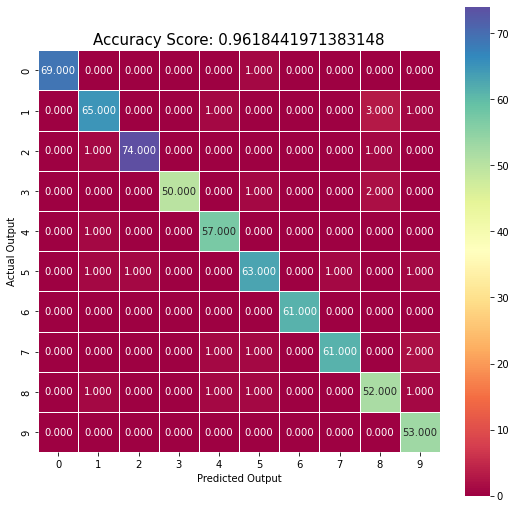

In [14]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap='Spectral')
plt.ylabel('Actual Output')
plt.xlabel('Predicted Output')
all_sample_title  = 'Accuracy Score: {0}'.format(score1)
plt.title(all_sample_title, size = 15)

In [15]:
# Getting miss classsification labels

import numpy as np
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, prediction):
    if label != predict:
        misclassifiedIndexes.append(index)
        index += 1
        
misclassifiedIndexes

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

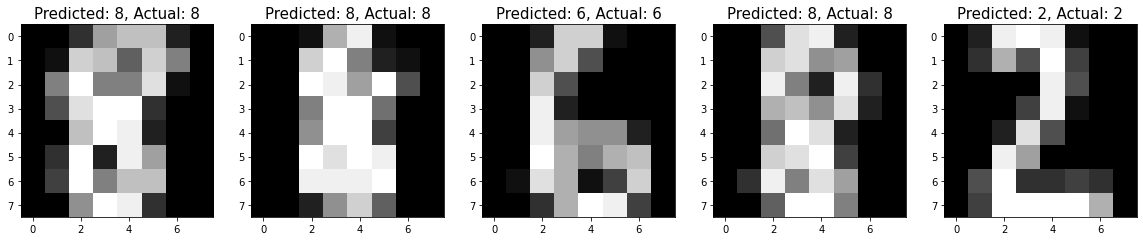

In [16]:
# plotting missclassified labels with known labels
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[5:10]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(prediction[badIndex], y_test[badIndex]), fontsize=15)